Simple class to import depth dose example data in dosrznrc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First develop a function to load .plotdat file

In [27]:
file = "air.plotdat"

In [43]:
header = np.genfromtxt(file, dtype='str', max_rows=15, delimiter='@')
header

array([['', 'g0 type xy'],
       ['',
        '    title "depth_dose_example central axis depth-dose curve in H2O due"'],
       ['', '    subtitle "dose vs. depth on Thu Sep  8 16:56:21 2016"'],
       ['', '    legend on'],
       ['', '    legend box linestyle 0'],
       ['', '    legend x1 0.6'],
       ['', '    legend y1 0.75'],
       ['', '    view xmin 0.250000'],
       ['', '    xaxis  label "depth/cm"'],
       ['', '    timestamp on'],
       ['', '    yaxis  label "dose per incident fluence/Gy cm\\\\S2\\\\N"'],
       ['', '    s0 on'],
       ['', '    legend string  0 "dose at r'],
       ['', '    s0 errorbar length 0.000000'],
       ['', '    s0 symbol color 1']], 
      dtype='<U71')

In [48]:
plot_type = header[0][1][8:]
plot_type

'xy'

In [51]:
plot_title = header[1][1][10:]
plot_title

'"depth_dose_example central axis depth-dose curve in H2O due"'

In [58]:
xaxis_label= header[8][1][17:]
xaxis_label

'"depth/cm"'

In [62]:
yaxis_label= header[10][1][17:]
yaxis_label

'"dose per incident fluence/Gy cm\\\\S2\\\\N"'

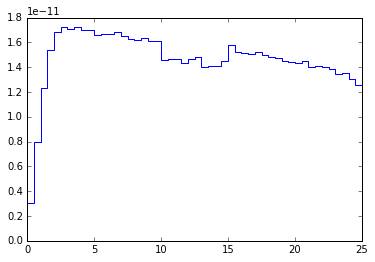

In [28]:
data = np.genfromtxt(file, dtype=None, skip_header=16, skip_footer=1) # header always 16 rows?
data.shape   # (152, 3). Col0 = position (cm), Col1 = dose. COl2 = error?
plt.plot(data[:,0], data[:,1])

In [5]:
class dose_2d:
   'Common base class for depth dose and profile plots'

   def __init__(self, file, plot_type):
    self.plot_type = plot_type
    self.data = np.loadtxt(file)    # load text file
   
   def displayType(self):
    print( "Type : ", self.plot_type) 

   def plot_dd(self):
    plt.plot(self.data[:,0], self.data[:,1])
     

In [6]:
plot1 = dose_2d('06e_z.dat', 'dd')

In [7]:
plot1.displayType()

Type :  dd


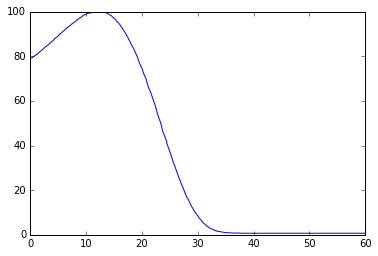

In [8]:
plot1.plot_dd()